In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X=np.random.rand(100,1)-0.5
y=3*X[:,0]**2+0.5*np.random.random(100)

In [3]:
import pandas as pd

In [4]:
df=pd.DataFrame()

In [5]:
df['X']=X.reshape(100)
df['y']=y

In [6]:
df

,X,y
0,-0.125460,0.062935
1,0.450714,0.927635
2,0.231994,0.318642
3,0.098658,0.283486
4,-0.343981,0.808753
...,...,...
95,-0.006204,0.174720
96,0.022733,0.364528
97,-0.072459,0.464306
98,-0.474581,1.119224


Text(0.5, 1.0, 'X vs y')

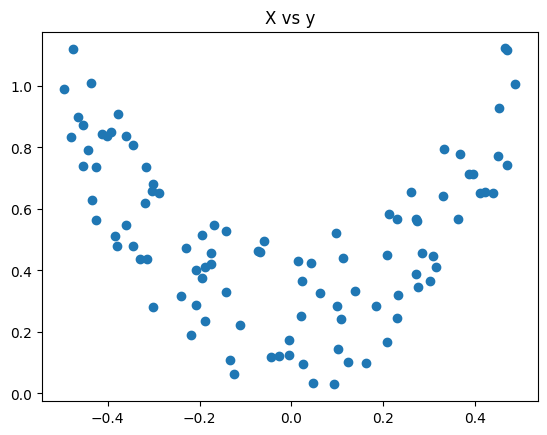

In [7]:
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [8]:
df['pred1']=df['y'].mean()

In [9]:
df

,X,y,pred1
0,-0.125460,0.062935,0.514428
1,0.450714,0.927635,0.514428
2,0.231994,0.318642,0.514428
3,0.098658,0.283486,0.514428
4,-0.343981,0.808753,0.514428
...,...,...,...
95,-0.006204,0.174720,0.514428
96,0.022733,0.364528,0.514428
97,-0.072459,0.464306,0.514428
98,-0.474581,1.119224,0.514428


In [10]:
df['res1']=df['y']-df['pred1']

In [11]:
df

,X,y,pred1,res1
0,-0.125460,0.062935,0.514428,-0.451493
1,0.450714,0.927635,0.514428,0.413207
2,0.231994,0.318642,0.514428,-0.195787
3,0.098658,0.283486,0.514428,-0.230942
4,-0.343981,0.808753,0.514428,0.294324
...,...,...,...,...
95,-0.006204,0.174720,0.514428,-0.339708
96,0.022733,0.364528,0.514428,-0.149900
97,-0.072459,0.464306,0.514428,-0.050122
98,-0.474581,1.119224,0.514428,0.604796


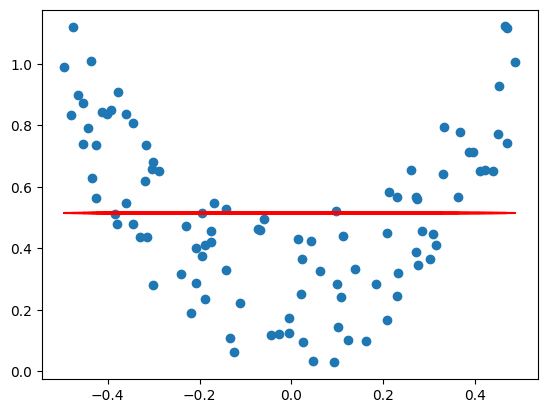

In [13]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
tree1=DecisionTreeRegressor(max_leaf_nodes=8)

In [20]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,8
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [21]:
from sklearn.tree import plot_tree

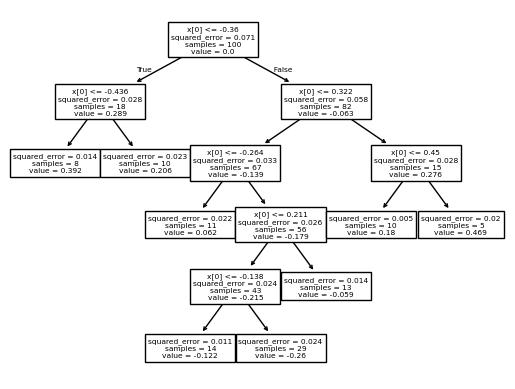

In [22]:
plot_tree(tree1)
plt.show()

In [23]:
#generating X_test
X_test=np.linspace(-0.05,0.5,500)

In [24]:
y_pred=0.514428+tree1.predict(X_test.reshape(500,1))

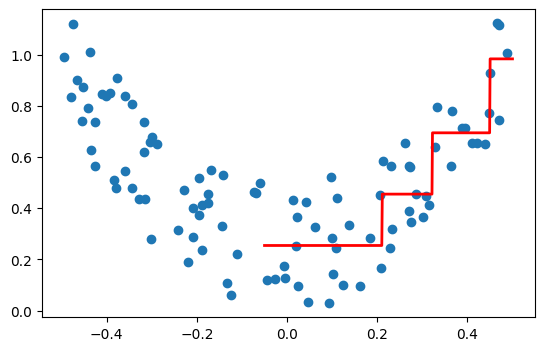

In [25]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test,y_pred,linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [26]:
df['pred2']=0.514428+tree1.predict(df['X'].values.reshape(100,1))

In [27]:
df

,X,y,pred1,res1,pred2
0,-0.125460,0.062935,0.514428,-0.451493,0.254657
1,0.450714,0.927635,0.514428,0.413207,0.982974
2,0.231994,0.318642,0.514428,-0.195787,0.455130
3,0.098658,0.283486,0.514428,-0.230942,0.254657
4,-0.343981,0.808753,0.514428,0.294324,0.576094
...,...,...,...,...,...
95,-0.006204,0.174720,0.514428,-0.339708,0.254657
96,0.022733,0.364528,0.514428,-0.149900,0.254657
97,-0.072459,0.464306,0.514428,-0.050122,0.254657
98,-0.474581,1.119224,0.514428,0.604796,0.906892


In [39]:
df['res2']=df['y']-df['pred2']

In [40]:
df

,X,y,pred1,res1,pred2,res22,res2
0,-0.125460,0.062935,0.514428,-0.451493,0.514428,-0.451493,-0.451493
1,0.450714,0.927635,0.514428,0.413207,0.514428,0.413207,0.413207
2,0.231994,0.318642,0.514428,-0.195787,0.514428,-0.195787,-0.195787
3,0.098658,0.283486,0.514428,-0.230942,0.514428,-0.230942,-0.230942
4,-0.343981,0.808753,0.514428,0.294324,0.514428,0.294324,0.294324
...,...,...,...,...,...,...,...
95,-0.006204,0.174720,0.514428,-0.339708,0.514428,-0.339708,-0.339708
96,0.022733,0.364528,0.514428,-0.149900,0.514428,-0.149900,-0.149900
97,-0.072459,0.464306,0.514428,-0.050122,0.514428,-0.050122,-0.050122
98,-0.474581,1.119224,0.514428,0.604796,0.514428,0.604796,0.604796


In [36]:
tree2=DecisionTreeRegressor(max_leaf_nodes=8)

In [37]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,8
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [41]:
y_pred=0.514428+sum(regressor.predict(X_test.reshape(-1,1)) for regressor in[tree1,tree2])

Text(0.5, 1.0, 'X vs y')

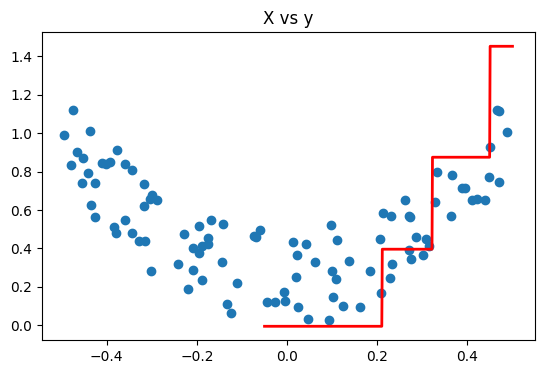

In [42]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test,y_pred,linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [45]:
def gra_boosting(X,y,number,lr,count=1,regs=[],foo=None):
    if number==0:
        return
    else:
        if count > 1:
            y = y-regs[-1].predict(X)
        else:
            foo=y
        tree_reg=DecisionTreeRegressor(max_depth=5, random_state=42)
        tree_reg.fit(X,y)
        regs.append(tree_reg)
        x1 = np.linspace(-0.5, 0.5, 500)
        y_pred=sum(lr*regressor.predict(x1.reshape(-1,1)) for regressor in regs)
        print(number)
        plt.figure()
        plt.plot(x1, y_pred,linewidth=2)
        plt.plot(X[:,0], foo,'r.')
        plt.show()
        gra_boosting(X,y,number-1,lr,count+1,regs,foo=foo)

5


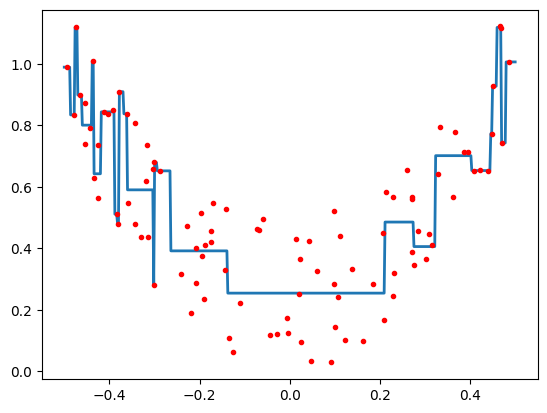

4


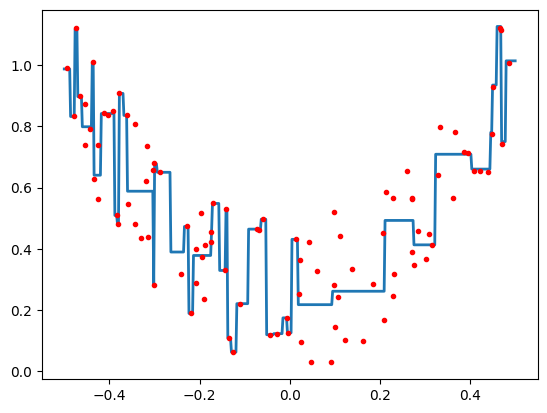

3


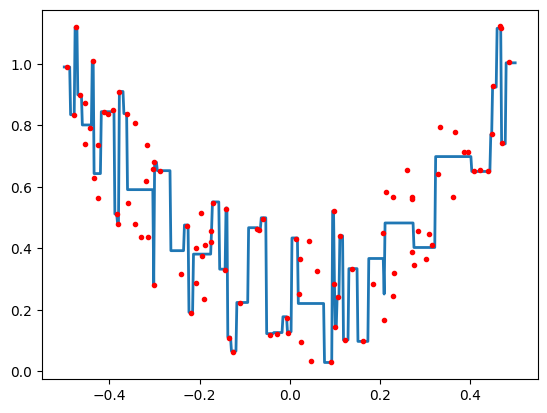

2


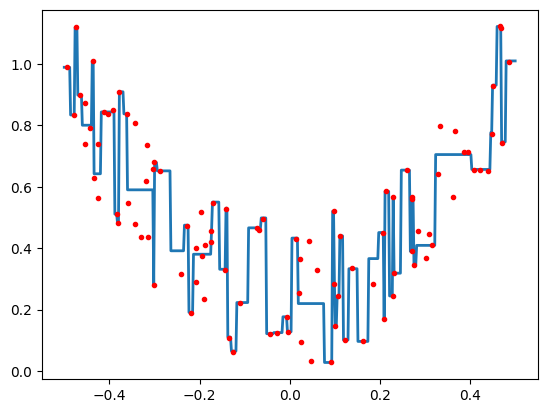

1


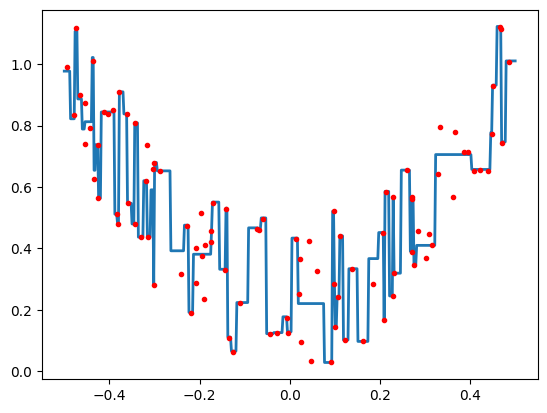

In [46]:
np.random.seed(42)
X=np.random.rand(100,1)-0.5
y=3*X[:,0]**2+0.5*np.random.random(100)
gra_boosting(X,y,5,lr=1)